In [1]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

#  Mount Google Drive
drive.mount('/content/drive')

#  Set the path to your CSV file
file_path = '/content/drive/MyDrive/Obesity prediction.csv'

#  Read the CSV file
df = pd.read_csv(file_path)

#  Basic checks
print(" Dataset Loaded Successfully!\n")
print("Shape:", df.shape)#how many rows,colums
print(tabulate(df.head(10), headers='keys', tablefmt='pretty'))


Mounted at /content/drive
 Dataset Loaded Successfully!

Shape: (2111, 17)
+---+--------+------+--------+--------+----------------+------+------+-----+-----------+-------+------+-----+-----+-----+------------+-----------------------+---------------------+
|   | Gender | Age  | Height | Weight | family_history | FAVC | FCVC | NCP |   CAEC    | SMOKE | CH2O | SCC | FAF | TUE |    CALC    |        MTRANS         |       Obesity       |
+---+--------+------+--------+--------+----------------+------+------+-----+-----------+-------+------+-----+-----+-----+------------+-----------------------+---------------------+
| 0 | Female | 21.0 |  1.62  |  64.0  |      yes       |  no  | 2.0  | 3.0 | Sometimes |  no   | 2.0  | no  | 0.0 | 1.0 |     no     | Public_Transportation |    Normal_Weight    |
| 1 | Female | 21.0 |  1.52  |  56.0  |      yes       |  no  | 3.0  | 3.0 | Sometimes |  yes  | 3.0  | yes | 3.0 | 0.0 | Sometimes  | Public_Transportation |    Normal_Weight    |
| 2 |  Male  | 23.0 

In [2]:
#  Basic info about dataset
print("\n Dataset Info:")
df.info()

#  Summary statistics for numerical columns
print("\n Summary Statistics (Numerical Features):")
print(df.describe())

#  Summary for categorical columns
print("\n Summary Statistics (Categorical Features):")
print(df.describe(include=['object']))

#  Check for missing/null values
print("\n Missing Values per Column:")
print(df.isnull().sum())

#  Display only columns with missing values (if any)
missing = df.isnull().sum()
missing_cols = missing[missing > 0]
if len(missing_cols) > 0:
    print("\n Columns with Missing Values:",missing_cols)
else:
    print("\n No Missing Values Found in the Dataset.")


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), ob

Columns containing zero values:

TUE    557
FAF    411
dtype: int64


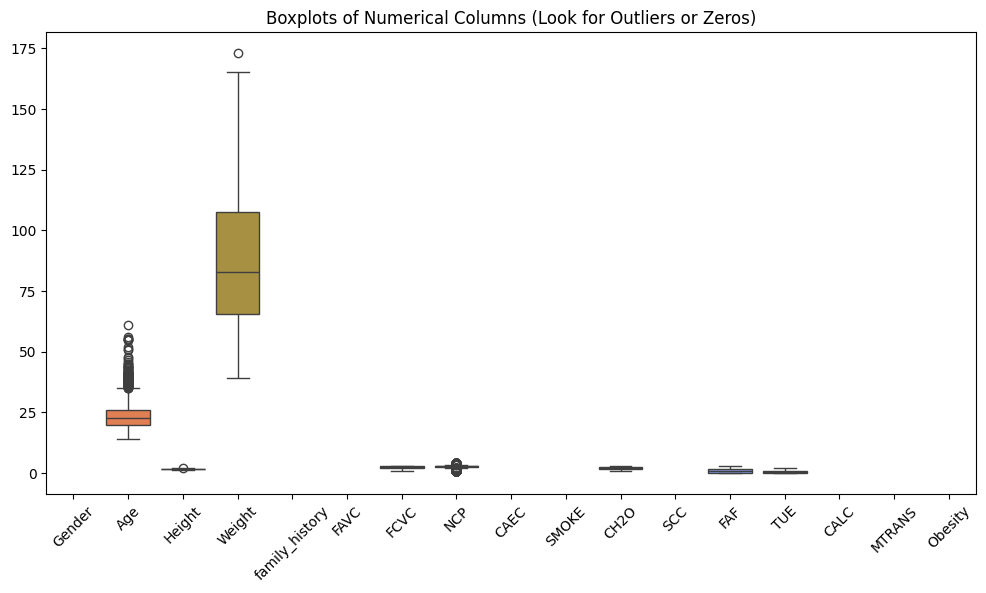

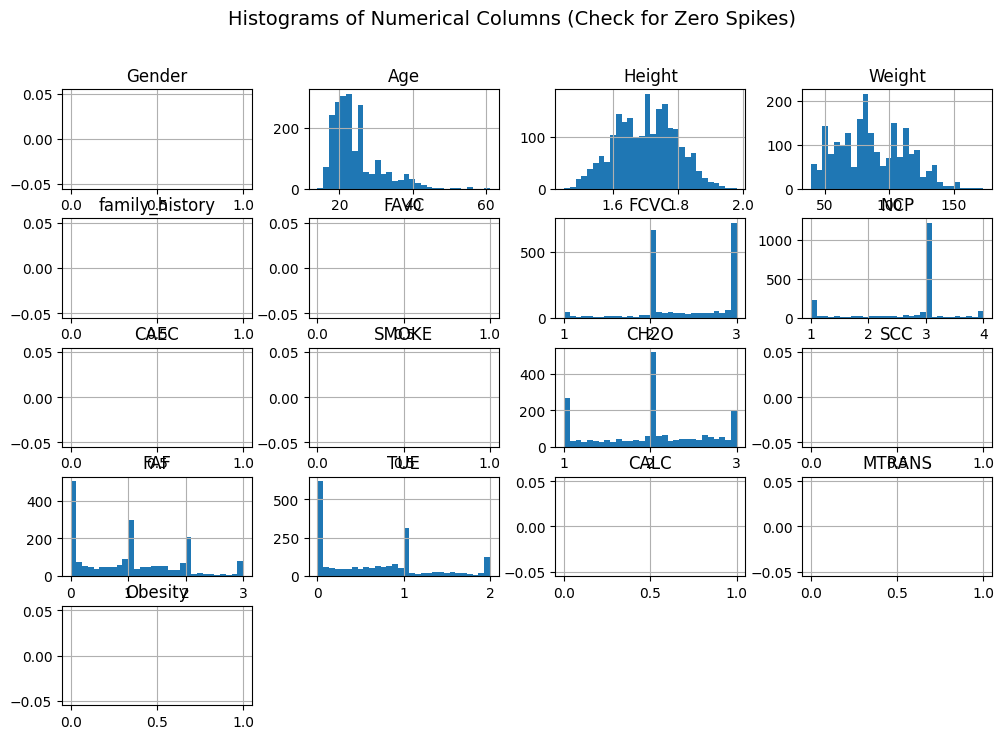

In [3]:
#  Count 0s per numeric column correctly
# If not already created, ensure numeric conversion
df_numeric = df.copy()
for col in df.columns:
    df_numeric[col] = pd.to_numeric(df_numeric[col], errors='coerce')

# Select numeric columns
numeric_cols = df_numeric.select_dtypes(include=['float64', 'int64']).columns

# Count zeros
zero_counts = (df_numeric[numeric_cols] == 0).sum()

# Display columns that actually contain zeros
print("Columns containing zero values:\n")
print(zero_counts[zero_counts > 0].sort_values(ascending=False))

# Optional: show if no zeros found
if (zero_counts == 0).all():
    print("\n No zero values found in any numeric column.")

# Plot distributions to visually inspect zeros
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_numeric[numeric_cols])
plt.title('Boxplots of Numerical Columns (Look for Outliers or Zeros)')
plt.xticks(rotation=45)
plt.show()

# Histogram view to see spikes at 0
df_numeric[numeric_cols].hist(figsize=(12, 8), bins=30)
plt.suptitle('Histograms of Numerical Columns (Check for Zero Spikes)', fontsize=14)
plt.show()


In [4]:
top5_weights = df['Weight'].nlargest(15)
print(top5_weights)

344     173.000000
502     165.057269
1898    160.935351
1910    160.639405
1838    155.872093
1998    155.242672
1897    154.618446
1997    153.959945
2029    153.149491
1826    152.720545
1926    152.567671
2030    152.473675
1949    152.435630
1909    152.394739
1973    152.371911
Name: Weight, dtype: float64


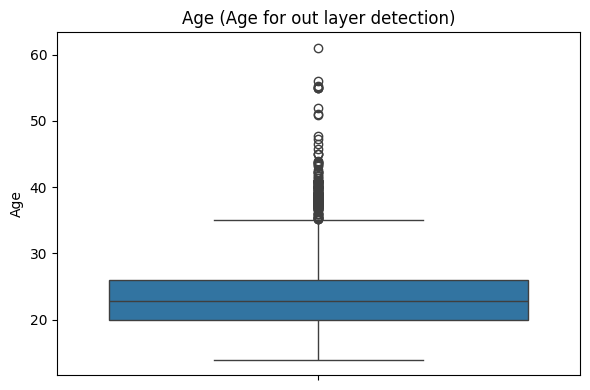

In [5]:
# ==========================================================
# Box Plot of Age for out layer detection
# ==========================================================

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(y=df['Age'])
plt.title("Age (Age for out layer detection)")
plt.ylabel("Age")
plt.tight_layout()
plt.show()


In [6]:
# ==========================================================
# Remove outliers in Age and apply Global KNN imputation
# ==========================================================

'''import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# -------- Step 1: IQR Outlier Detection for Age --------
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.7 * IQR
upper_bound = Q3 + 2.6 * IQR

print(f"Lower Bound for Age: {lower_bound:.2f}")
print(f"Upper Bound for Age: {upper_bound:.2f}")

# Replace outliers with NaN
df['Age'] = df['Age'].mask((df['Age'] < lower_bound) | (df['Age'] > upper_bound))

print("\nOutliers replaced with NaN in Age:")
print(f"Missing values in Age: {df['Age'].isna().sum()}")

# -------- Step 2: Global KNN Imputation (All numeric cols) --------
num_cols = df.select_dtypes(include=[np.number]).columns

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[num_cols])

imputer = KNNImputer(n_neighbors=5)
imputed_scaled = imputer.fit_transform(scaled_data)

imputed = scaler.inverse_transform(imputed_scaled)

df[num_cols] = imputed

print("\nGlobal KNN imputation done.")
print("Remaining NaN values after imputation:")
print(df.isna().sum())'''


'import numpy as np\nfrom sklearn.impute import KNNImputer\nfrom sklearn.preprocessing import StandardScaler\n\n# -------- Step 1: IQR Outlier Detection for Age --------\nQ1 = df[\'Age\'].quantile(0.25)\nQ3 = df[\'Age\'].quantile(0.75)\nIQR = Q3 - Q1\nlower_bound = Q1 - 1.7 * IQR\nupper_bound = Q3 + 2.6 * IQR\n\nprint(f"Lower Bound for Age: {lower_bound:.2f}")\nprint(f"Upper Bound for Age: {upper_bound:.2f}")\n\n# Replace outliers with NaN\ndf[\'Age\'] = df[\'Age\'].mask((df[\'Age\'] < lower_bound) | (df[\'Age\'] > upper_bound))\n\nprint("\nOutliers replaced with NaN in Age:")\nprint(f"Missing values in Age: {df[\'Age\'].isna().sum()}")\n\n# -------- Step 2: Global KNN Imputation (All numeric cols) --------\nnum_cols = df.select_dtypes(include=[np.number]).columns\n\nscaler = StandardScaler()\nscaled_data = scaler.fit_transform(df[num_cols])\n\nimputer = KNNImputer(n_neighbors=5)\nimputed_scaled = imputer.fit_transform(scaled_data)\n\nimputed = scaler.inverse_transform(imputed_scaled)\

In [7]:
# Find the index of the highest weight
'''max_index = df['Weight'].idxmax()
print(max_index)
# Drop that row from the DataFrame
df = df.drop(max_index)
print(f'Highest Weight value removed and saved successfully {max_index}.')'''

"max_index = df['Weight'].idxmax()\nprint(max_index)\n# Drop that row from the DataFrame\ndf = df.drop(max_index)\nprint(f'Highest Weight value removed and saved successfully {max_index}.')"

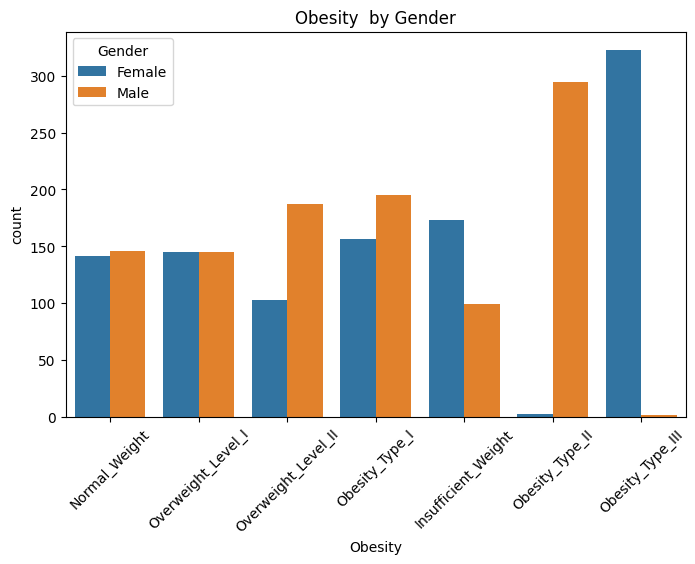

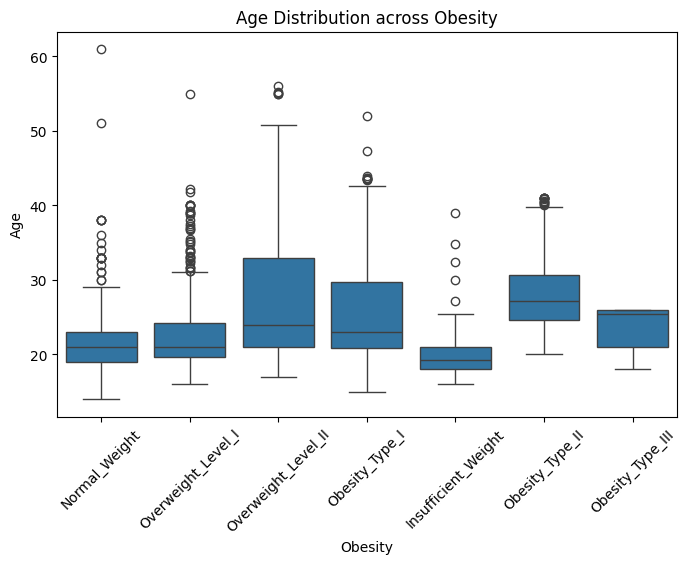

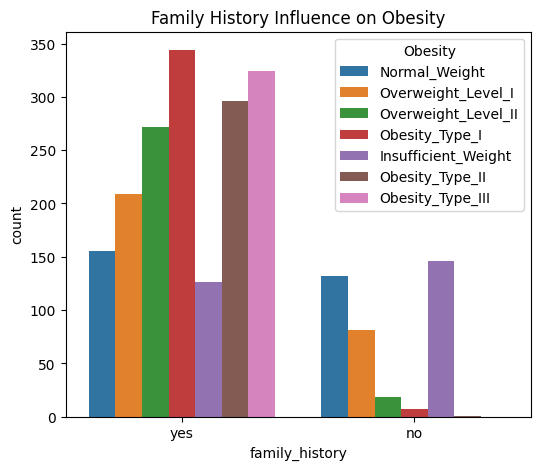

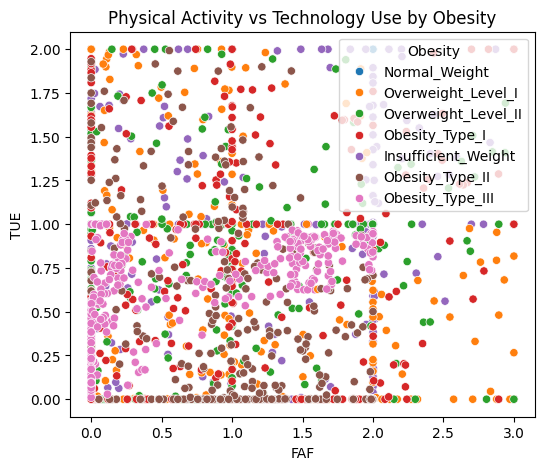

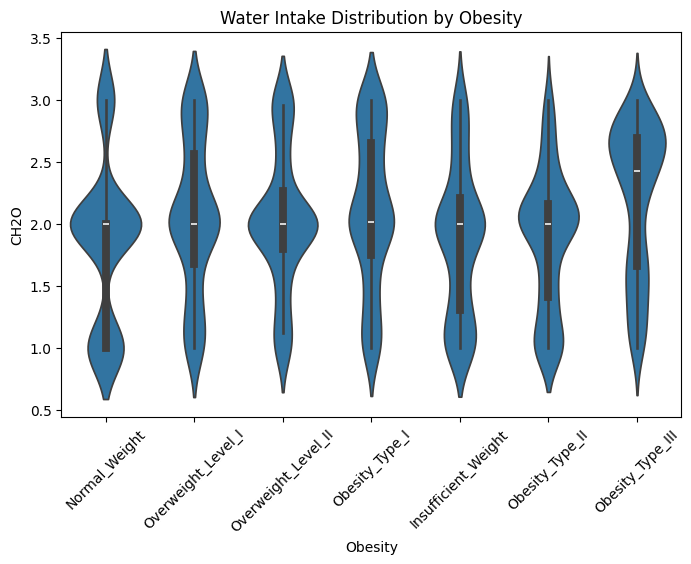

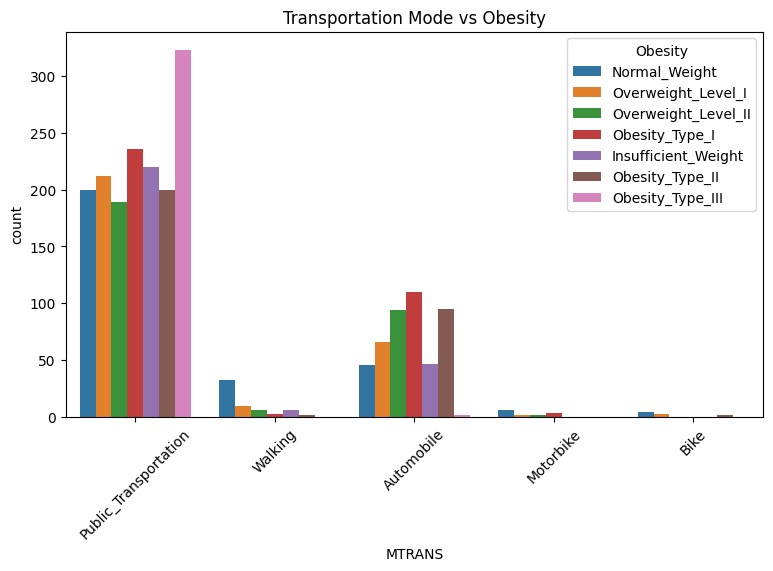

In [8]:
#  Gender vs Obesity Level
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Obesity', hue='Gender')
plt.title("Obesity  by Gender")
plt.xticks(rotation=45)
plt.show()

# Age Distribution by Obesity Level
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Obesity', y='Age')
plt.title("Age Distribution across Obesity")
plt.xticks(rotation=45)
plt.show()

#  Family History vs Obesity Level
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='family_history', hue='Obesity')
plt.title("Family History Influence on Obesity")
plt.show()

#  Physical Activity vs Technology Use
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x='FAF', y='TUE', hue='Obesity')
plt.title("Physical Activity vs Technology Use by Obesity")
plt.show()

#  Water Intake vs Obesity Level
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x='Obesity', y='CH2O')
plt.title("Water Intake Distribution by Obesity")
plt.xticks(rotation=45)
plt.show()

# Transportation Mode vs Obesity Level
plt.figure(figsize=(9,5))
sns.countplot(data=df, x='MTRANS', hue='Obesity')
plt.title("Transportation Mode vs Obesity")
plt.xticks(rotation=45)
plt.show()


In [9]:
print(df.isnull().sum())

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64


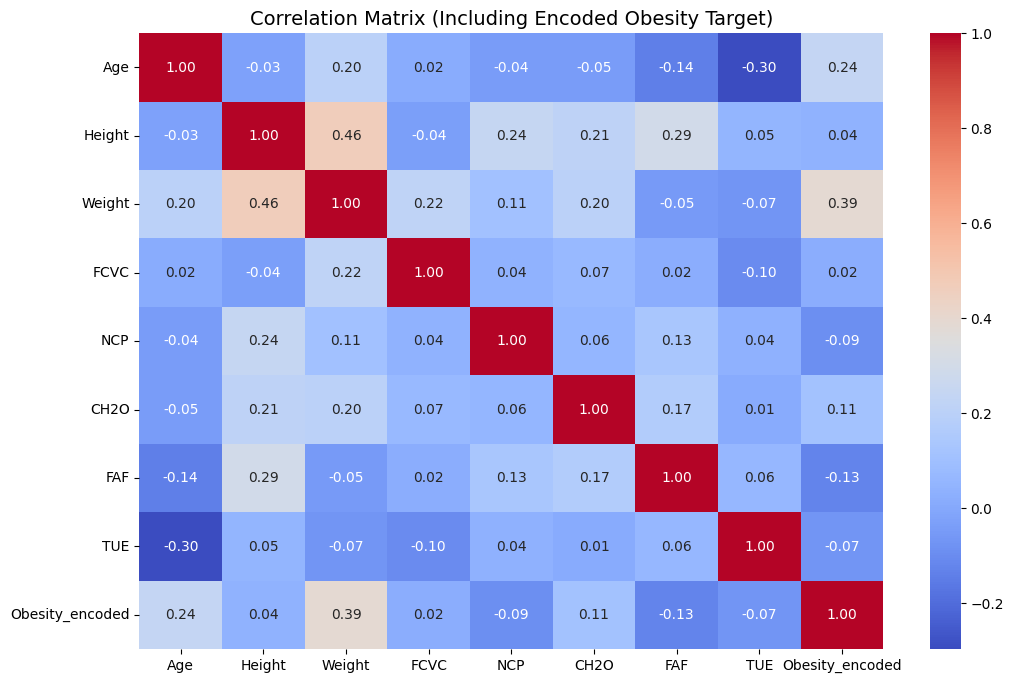

Top correlated features with Obesity (encoded):

Obesity_encoded    1.00
Weight             0.39
Age                0.24
CH2O               0.11
Height             0.04
FCVC               0.02
TUE               -0.07
NCP               -0.09
FAF               -0.13
Name: Obesity_encoded, dtype: float64
Top correlated features with Obesity (encoded):



,Correlation
Obesity_encoded,1.000000
Weight,0.390000
Age,0.240000
CH2O,0.110000
Height,0.040000
FCVC,0.020000
TUE,-0.070000
NCP,-0.090000
FAF,-0.130000


In [10]:
# ===========================================================
# Encode Categorical Target + Correlation Matrix
# ===========================================================

# Encode the target column 'Obesity'
df['Obesity_encoded'] = df['Obesity'].astype('category').cat.codes

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Add the encoded target column for correlation
numeric_df['Obesity_encoded'] = df['Obesity_encoded']

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# 5Plot correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Including Encoded Obesity Target)", fontsize=14)
plt.show()

# Identify top correlated features with target
target_col = 'Obesity_encoded'
target_corr = corr_matrix[target_col].sort_values(ascending=False).round(2)

print("Top correlated features with Obesity (encoded):\n")
print(target_corr.head(10))
print("Top correlated features with Obesity (encoded):\n")
display(target_corr.head(10).to_frame(name='Correlation').style.background_gradient(cmap='coolwarm'))



In [11]:
# ============================================================
# LOGISTIC REGRESSION - For Obesity Classification
# ============================================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# ----------------------------
#  Prepare data
# ----------------------------
df=df.drop_duplicates()
target = 'Obesity'
X = df.drop(columns=[target])
y = df[target]

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# ----------------------------
#  Preprocessing
# ----------------------------
cat_cols = X.select_dtypes(include=['object', 'category']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# ----------------------------
#  Logistic Regression pipeline
# ----------------------------
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto'))
])

# ----------------------------
#  Train and evaluate
# ----------------------------
logreg_pipeline.fit(X_train, y_train)
y_pred = logreg_pipeline.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall    = recall_score(y_test, y_pred, average='weighted')
f1        = f1_score(y_test, y_pred, average='weighted')

print("=== Logistic Regression (Obesity Classification) ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


=== Logistic Regression (Obesity Classification) ===
Accuracy : 0.8971
Precision: 0.8950
Recall   : 0.8971
F1 Score : 0.8954

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.95      1.00      0.97        53
      Normal_Weight       0.84      0.82      0.83        57
     Obesity_Type_I       0.92      0.93      0.92        70
    Obesity_Type_II       0.94      1.00      0.97        60
   Obesity_Type_III       0.98      0.98      0.98        65
 Overweight_Level_I       0.80      0.80      0.80        55
Overweight_Level_II       0.82      0.72      0.77        58

           accuracy                           0.90       418
          macro avg       0.89      0.89      0.89       418
       weighted avg       0.89      0.90      0.90       418



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [12]:
# ============================================================
# GRADIENT BOOSTING CLASSIFIER - Obesity Dataset
# ============================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

# ------------------------------------------------------------
#  Load and prepare dataset
# ------------------------------------------------------------
# df = pd.read_csv("/content/drive/MyDrive/Obesity_cleaned.csv")

target = 'Obesity'
X = df.drop(columns=[target])
df=df.drop_duplicates()
y = df[target]

# Encode categorical target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# ------------------------------------------------------------
#  Preprocessing (Handle categorical + numeric)
# ------------------------------------------------------------
cat_cols = X.select_dtypes(include=['object', 'category']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# ------------------------------------------------------------
#  Build Pipeline with Gradient Boosting
# ------------------------------------------------------------
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('gb', GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ))
])

# ------------------------------------------------------------
#  Train Model
# ------------------------------------------------------------
gb_pipeline.fit(X_train, y_train)

# ------------------------------------------------------------
#  Predictions & Evaluation
# ------------------------------------------------------------
y_pred = gb_pipeline.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall    = recall_score(y_test, y_pred, average='weighted')
f1        = f1_score(y_test, y_pred, average='weighted')

print("=== Gradient Boosting Classifier (Obesity Classification) ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


=== Gradient Boosting Classifier (Obesity Classification) ===
Accuracy : 0.9809
Precision: 0.9810
Recall   : 0.9809
F1 Score : 0.9809

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00        53
      Normal_Weight       0.96      0.95      0.96        57
     Obesity_Type_I       1.00      0.99      0.99        70
    Obesity_Type_II       0.98      1.00      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.93      0.95      0.94        55
Overweight_Level_II       0.98      1.00      0.99        58

           accuracy                           0.98       418
          macro avg       0.98      0.98      0.98       418
       weighted avg       0.98      0.98      0.98       418


Confusion Matrix:
[[53  0  0  0  0  0  0]
 [ 0 54  0  0  0  3  0]
 [ 0  0 69  0  0  1  0]
 [ 0  0  0 60  0  0  0]
 [ 0  0  0  1 64  0  0]
 [ 0  2  0  0  0 52  1]
 [ 0 

In [13]:
# ============================================================
# GRADIENT BOOSTING CLASSIFIER with RandomizedSearchCV - Obesity Dataset
# ============================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
from scipy.stats import uniform, randint

# ------------------------------------------------------------
# 1. Load and prepare dataset
# ------------------------------------------------------------
# df = pd.read_csv("/content/drive/MyDrive/Obesity_cleaned.csv")

target = 'Obesity'
df = df.drop_duplicates()
X = df.drop(columns=[target])
y = df[target]

# Encode categorical target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# ------------------------------------------------------------
# 2. Preprocessing (Handle categorical + numeric)
# ------------------------------------------------------------
cat_cols = X.select_dtypes(include=['object', 'category']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# ------------------------------------------------------------
# 3. Gradient Boosting Pipeline
# ------------------------------------------------------------
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('gb', GradientBoostingClassifier(random_state=42))
])

# ------------------------------------------------------------
# 4. Define Hyperparameter Search Space
# ------------------------------------------------------------
param_dist = {
    'gb__n_estimators': randint(100, 500),
    'gb__learning_rate': uniform(0.01, 0.3),
    'gb__max_depth': randint(2, 6),
    'gb__min_samples_split': randint(2, 10),
    'gb__min_samples_leaf': randint(1, 6),
    'gb__subsample': uniform(0.7, 0.3)
}

# ------------------------------------------------------------
# 5. RandomizedSearchCV - 5-fold cross validation
# ------------------------------------------------------------
random_search = RandomizedSearchCV(
    estimator=gb_pipeline,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='f1_weighted',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# ------------------------------------------------------------
# 6. Fit the model
# ------------------------------------------------------------
random_search.fit(X_train, y_train)

print("\n=== Best Hyperparameters Found ===")
print(random_search.best_params_)

# ------------------------------------------------------------
# 7. Evaluate on Test Set
# ------------------------------------------------------------
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall    = recall_score(y_test, y_pred, average='weighted')
f1        = f1_score(y_test, y_pred, average='weighted')

print("\n=== Gradient Boosting Classifier (Best Tuned Model) ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits

=== Best Hyperparameters Found ===
{'gb__learning_rate': np.float64(0.1929989973347863), 'gb__max_depth': 5, 'gb__min_samples_leaf': 3, 'gb__min_samples_split': 7, 'gb__n_estimators': 180, 'gb__subsample': np.float64(0.777633994480005)}

=== Gradient Boosting Classifier (Best Tuned Model) ===
Accuracy : 0.9785
Precision: 0.9793
Recall   : 0.9785
F1 Score : 0.9786

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00        53
      Normal_Weight       0.98      0.95      0.96        57
     Obesity_Type_I       1.00      0.96      0.98        70
    Obesity_Type_II       0.97      1.00      0.98        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.92      0.98      0.95        55
Overweight_Level_II       0.98      0.98      0.98        58

           accuracy                           0.98       

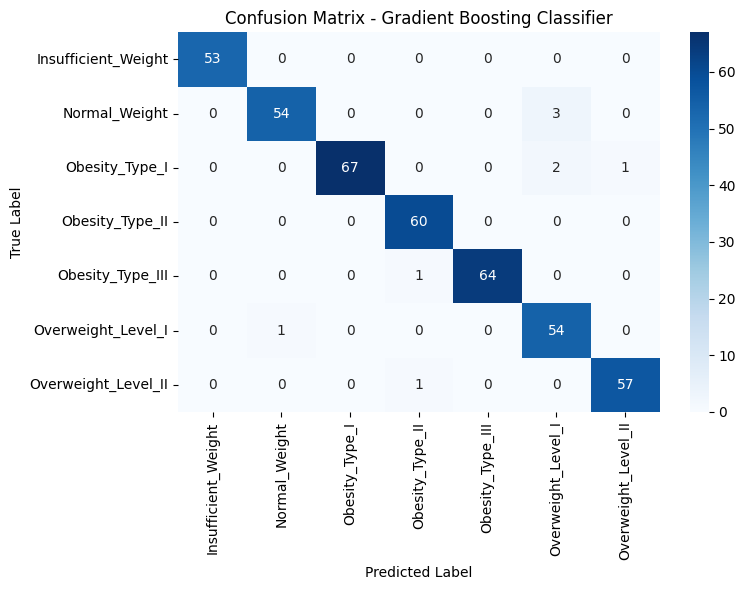

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# ------------------------------------------------------------
# 8. Confusion Matrix Visualization (Colored Heatmap)
# ------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
labels = le.classes_  # original class names (e.g., Normal, Overweight, etc.)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Gradient Boosting Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()
